In [227]:
# Load pandas and numpy libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set default option for Pandas
pd.set_option('display.max_rows',20)

# Plot inline in notebook
%pylab inline

#seaborn settings
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8,4)})


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [105]:
from impala.dbapi import connect
conn = connect(host='hdpdevdnc02.gmpvt.net',auth_mechanism='NOSASL',user='admin',database='mdm')
cur=conn.cursor(user='admin')
#cur.execute('SHOW TABLES')
#cur.fetchall()
#df = as_pandas(cur)

In [106]:
from impala.util import as_pandas
cur.execute('select msrmt_year,msrmt_month, premise_zip, avg(msrmt_val) gen from mdm.cm_gen_hrlygross_2015 where sa_type_cd=\'XGRPGELC\' group by msrmt_year,msrmt_month, premise_zip union all select msrmt_year,msrmt_month, premise_zip, avg(msrmt_val) gen from mdm.cm_gen_hrlygross_2016 where sa_type_cd=\'XGRPGELC\' group by msrmt_year,msrmt_month, premise_zip')
df_gen_city = as_pandas(cur)
df_gen_city

,msrmt_year,msrmt_month,premise_zip,gen
0,2016,3,05766,6.943871
1,2016,7,05736,31.291798
2,2016,6,05734,42.446414
3,2016,5,05048,33.964219
4,2016,5,05047,127.380435
5,2016,2,05301-8435,0.210938
6,2016,3,05055,1.488450
7,2016,9,05759,26.249861
8,2016,7,05101-3314,11.536109
9,2016,11,05701-4015,0.995879


In [107]:
#df.pivot(index='foo', columns='bar', values='baz')
df_gen_city_aug=df_gen_city[(df_gen_city.msrmt_month==8)].pivot(index='premise_zip',columns='msrmt_year',values='gen')

In [108]:
df_gen_city_aug.count()

msrmt_year
2015     88
2016    115
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1225c9da0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1228d4ac8>]], dtype=object)

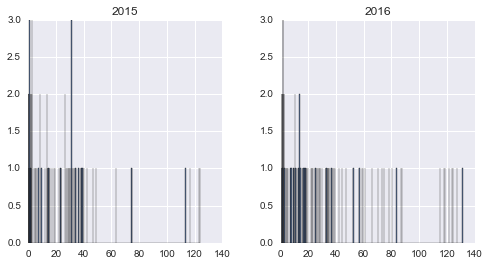

In [110]:
df_gen_city_aug.hist(bins=1000)

In [115]:
from impala.dbapi import connect
from impala.util import as_pandas
conn = connect(host='hdpdevdnc02.gmpvt.net',auth_mechanism='NOSASL',user='admin',database='mdm')
cur=conn.cursor(user='admin')
cur.execute('select a.msrmt_year,a.msrmt_month,a.sp_id,a.gen,b.app_first_name,b.app_city,b.capacity from\
(select msrmt_year,msrmt_month, sp_id, max(msrmt_val) gen from mdm.cm_gen_hrlygross_2015 where sa_type_cd=\'XGRPGELC\' \
group by msrmt_year,msrmt_month, sp_id union all \
select msrmt_year,msrmt_month, sp_id, max(msrmt_val) gen from mdm.cm_gen_hrlygross_2016 where sa_type_cd=\'XGRPGELC\' \
group by msrmt_year,msrmt_month, sp_id)a,mdm.cm_bi_cpg b where a.sp_id=b.sp_id')
df_gen_cap = as_pandas(cur)            

In [116]:
df_gen_cap.head()

,msrmt_year,msrmt_month,sp_id,gen,app_first_name,app_city,capacity
0,2016,3,5662820782,5.050,Inc.,Cavendish,5.5
1,2016,8,4219977357,119.120,C/o Richard & Teresa Banks,Essex,150.0
2,2016,5,1985095195,3.590,Liz & Angus,Norwich,3.8
3,2016,1,8583820592,51.579,None,N. Springfield,143.8
4,2016,4,3922630799,113.840,David,Essex,148.2


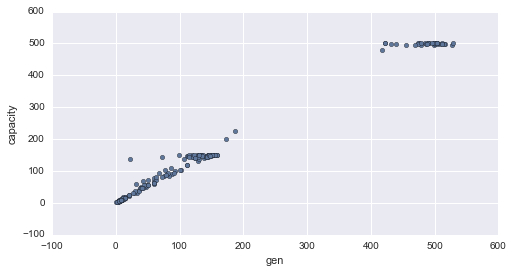

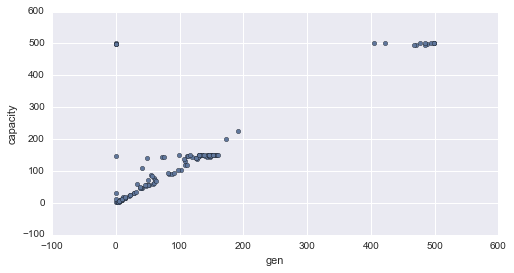

In [130]:

df_gen_cap[(df_gen_cap.msrmt_month==8)&(df_gen_cap.msrmt_year==2016)].plot.scatter(x='gen',y='capacity')
df_gen_cap[(df_gen_cap.msrmt_month==8)&(df_gen_cap.msrmt_year==2015)].plot.scatter(x='gen',y='capacity')


In [136]:
conn = connect(host='hdpdevdnc02.gmpvt.net',auth_mechanism='NOSASL',user='admin',database='mdm')
cur=conn.cursor(user='admin')
cur.execute('select a.msrmt_year,a.msrmt_month,b.app_city,sum(a.gen)gen,sum(gen_tot)gen_tot,sum(b.capacity)capacity from\
(select msrmt_year,msrmt_month, sp_id, max(msrmt_val) gen,sum(msrmt_val) gen_tot from mdm.cm_gen_hrlygross_2015 where sa_type_cd=\'XGRPGELC\' \
group by msrmt_year,msrmt_month, sp_id union all \
select msrmt_year,msrmt_month, sp_id, max(msrmt_val) gen,sum(msrmt_val) gen_tot from mdm.cm_gen_hrlygross_2016 where sa_type_cd=\'XGRPGELC\' \
group by msrmt_year,msrmt_month, sp_id)a,mdm.cm_bi_cpg b where a.sp_id=b.sp_id \
group by a.msrmt_year,a.msrmt_month,b.app_city')
df_gen_cap_city = as_pandas(cur)  

In [160]:
df_gen_cap_city[(df_gen_cap_city.msrmt_month==8)&(df_gen_cap_city.msrmt_year==2016)].sort_values(by='gen_tot',ascending=False).head()

,msrmt_year,msrmt_month,app_city,gen,gen_tot,capacity
640,2016,8,Ferrisburgh,1305.0775,242784.9105,1294.00
566,2016,8,Westminster,1133.1840,202227.6165,1150.00
2142,2016,8,Springfield,1006.8240,181042.2470,1160.55
1578,2016,8,New Haven,921.7930,175969.3020,965.00
1014,2016,8,Royalton,987.4920,175443.0300,997.60


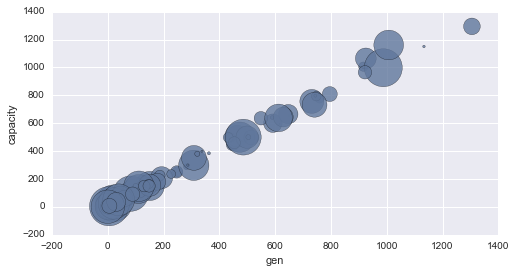

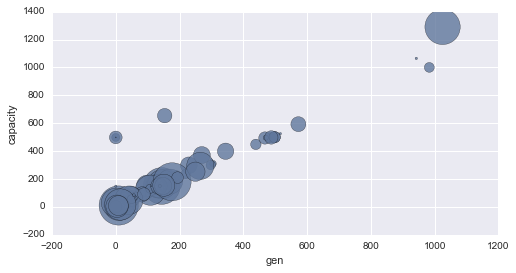

In [155]:
df_gen_cap_city[(df_gen_cap_city.msrmt_month==8)&(df_gen_cap_city.msrmt_year==2016)].plot.scatter(x='gen',y='capacity',s=df_gen_cap_city.gen_tot/100,alpha=0.8).grid(True)
df_gen_cap_city[(df_gen_cap_city.msrmt_month==8)&(df_gen_cap_city.msrmt_year==2015)].plot.scatter(x='gen',y='capacity',s=df_gen_cap_city.gen_tot/100,alpha=0.8).grid(True)



In [370]:
from impala.dbapi import connect
from impala.util import as_pandas
conn = connect(host='hdpdevdnc02.gmpvt.net',auth_mechanism='NOSASL',user='admin',database='mdm')
cur=conn.cursor(user='admin')
cur.execute('select a.msrmt_year,a.msrmt_month,a.gen_tot,a.gen,b.capacity,a.sp_id pop from\
(select msrmt_year,msrmt_month, sp_id, max(msrmt_val) gen,sum(msrmt_val) gen_tot from mdm.cm_gen_hrlygross_2015 where sa_type_cd=\'XGRPGELC\' \
group by msrmt_year,msrmt_month, sp_id union all \
select msrmt_year,msrmt_month, sp_id, max(msrmt_val) gen,sum(msrmt_val) gen_tot from mdm.cm_gen_hrlygross_2016 where sa_type_cd=\'XGRPGELC\' \
group by msrmt_year,msrmt_month, sp_id)a,mdm.cm_bi_cpg b where a.sp_id=b.sp_id')
df_gen_cap_pop = as_pandas(cur)  

In [371]:
df_gen_cap_pop['cap_range']=df_gen_cap_pop.capacity//10*10
#df_gen_city_pop[(df_gen_city_pop.msrmt_month==8)&(df_gen_city_pop.msrmt_year==2016)].capacity

In [212]:
df_gen_cap_pop[(df_gen_cap_pop.msrmt_month==8)&(df_gen_cap_pop.msrmt_year==2016)].cap_range.describe()

count    217.000000
mean     151.013825
std      164.175507
min        0.000000
25%       20.000000
50%      140.000000
75%      150.000000
max      500.000000
Name: cap_range, dtype: float64

In [235]:
df_gen_cap_pop[(df_gen_cap_pop.msrmt_month==8)&(df_gen_cap_pop.msrmt_year==2016)].describe()

,msrmt_year,msrmt_month,gen_tot,capacity,cap_range
count,217.0,217.0,217.000000,217.000000,217.000000
mean,2016.0,8.0,27016.814626,154.659032,151.013825
std,0.0,0.0,30504.820179,163.729393,164.175507
min,2016.0,8.0,0.000000,1.330000,0.000000
25%,2016.0,8.0,2942.850000,22.500000,20.000000
50%,2016.0,8.0,19998.843000,142.500000,140.000000
75%,2016.0,8.0,28215.280000,150.000000,150.000000
max,2016.0,8.0,104659.440000,500.000000,500.000000


In [372]:
df_gen_cap_pop_aug16=df_gen_cap_pop[(df_gen_cap_pop.msrmt_month==8)&(df_gen_cap_pop.msrmt_year==2016)]
df_gen_cap_pop_aug16.count()
df_gen_cap_pop_aug15=df_gen_cap_pop[(df_gen_cap_pop.msrmt_month==8)&(df_gen_cap_pop.msrmt_year==2015)]
df_gen_cap_pop_aug15.count()

msrmt_year     137
msrmt_month    137
gen_tot        137
gen            137
capacity       137
pop            137
cap_range      137
dtype: int64

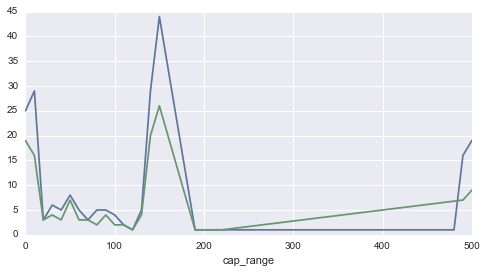

In [373]:
df_gen_cap_pop_aug16.groupby('cap_range').size().plot()
df_gen_cap_pop_aug15.groupby('cap_range').size().plot()

In [374]:
df_gen_cap_pop_aug16fin=pd.DataFrame({'count' : df_gen_cap_pop_aug16.groupby('cap_range').size(),'gen' : df_gen_cap_pop_aug16.groupby('cap_range').gen.sum()}
            ).reset_index()
df_gen_cap_pop_aug15fin=pd.DataFrame({'count' : df_gen_cap_pop_aug15.groupby('cap_range').size(),'gen' : df_gen_cap_pop_aug15.groupby('cap_range').gen.sum()}
            ).reset_index()

In [375]:
df_gen_cap_pop_aug16fin.sort_values(by='gen',ascending=False)

,cap_range,count,gen
20,500.0,19,9273.9555
19,490.0,16,7806.4620
15,150.0,44,6327.5430
14,140.0,29,3881.7730
13,130.0,5,511.1590
18,480.0,1,417.0960
9,90.0,5,410.3115
8,80.0,5,374.3245
10,100.0,4,371.3580
5,50.0,8,358.5046


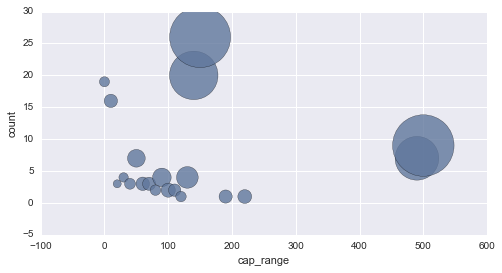

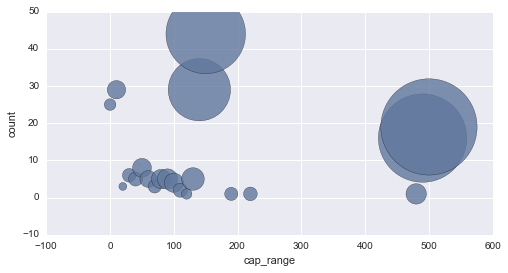

In [377]:
df_gen_cap_pop_aug15fin.plot.scatter(x='cap_range',y='count',s=df_gen_cap_pop_aug15fin['gen'],alpha=0.8)
df_gen_cap_pop_aug16fin.plot.scatter(x='cap_range',y='count',s=df_gen_cap_pop_aug16fin['gen'],alpha=0.8)

# Standalone - 150 KW installations are increased from 2015 to 2016 
# Standalone - 500 KW installations are increased from 2015 to 2016 but yeild is signifcant 




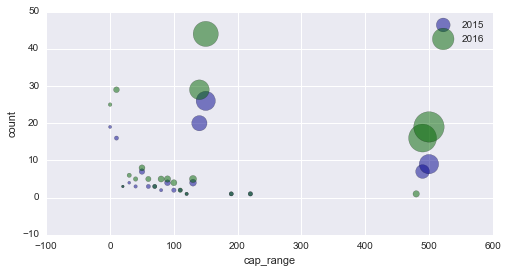

In [379]:
ax=df_gen_cap_pop_aug15fin.plot.scatter(x='cap_range',y='count',s=df_gen_cap_pop_aug15fin['gen']/10,alpha=.5
                                        ,label='2015',color='DarkBlue')
df_gen_cap_pop_aug16fin.plot.scatter(x='cap_range',y='count',s=df_gen_cap_pop_aug16fin['gen']/10,alpha=.5
                                     ,label='2016',color='DarkGreen',ax=ax)

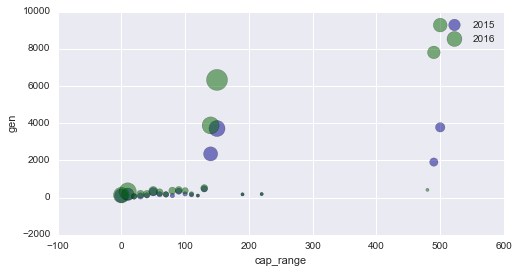

In [380]:
ax=df_gen_cap_pop_aug15fin.plot.scatter(x='cap_range',y='gen',s=df_gen_cap_pop_aug15fin['count']*10,alpha=.5
                                        ,label='2015',color='DarkBlue')
df_gen_cap_pop_aug16fin.plot.scatter(x='cap_range',y='gen',s=df_gen_cap_pop_aug16fin['count']*10,alpha=.5
                                     ,label='2016',color='DarkGreen',ax=ax)

# ALL - < 10 KW installations are increased from 2015 to 2016 


In [401]:
from impala.dbapi import connect
from impala.util import as_pandas
conn = connect(host='hdpdevdnc02.gmpvt.net',auth_mechanism='NOSASL',user='admin',database='mdm')
cur=conn.cursor(user='admin')
cur.execute('select a.msrmt_year,a.msrmt_month,a.gen_tot,a.gen,b.capacity,a.sp_id pop from\
(select msrmt_year,msrmt_month, sp_id, max(msrmt_val) gen,sum(msrmt_val) gen_tot from mdm.cm_gen_hrlygross_2015  \
group by msrmt_year,msrmt_month, sp_id union all \
select msrmt_year,msrmt_month, sp_id, max(msrmt_val) gen,sum(msrmt_val) gen_tot from mdm.cm_gen_hrlygross_2016  \
group by msrmt_year,msrmt_month, sp_id)a,mdm.cm_bi_cpg b where a.sp_id=b.sp_id')
df_gen_cap_pop_all = as_pandas(cur)  
df_gen_cap_pop_all['cap_range']=df_gen_cap_pop_all.capacity//10*10

In [405]:
df_gen_cap_pop_all.describe()

,msrmt_year,msrmt_month,gen_tot,gen,capacity,cap_range
count,78870.000000,78870.000000,78870.000000,78870.000000,78870.000000,78870.000000
mean,2015.549968,6.472968,1659.831950,12.690673,14.902056,10.020033
std,0.497500,3.287062,7264.263532,48.493888,59.209946,59.471139
min,2015.000000,1.000000,0.000000,0.000000,0.440000,0.000000
25%,2015.000000,4.000000,306.752500,3.440000,3.990000,0.000000
50%,2016.000000,7.000000,564.460000,4.730000,5.600000,0.000000
75%,2016.000000,9.000000,891.805000,6.770000,7.800000,0.000000
max,2016.000000,12.000000,212509.782000,1268.118000,2100.000000,2100.000000


In [402]:
df_gen_cap_pop_aug16_all=df_gen_cap_pop_all[(df_gen_cap_pop_all.msrmt_month==8)&(df_gen_cap_pop_all.msrmt_year==2016)]
#df_gen_cap_pop_aug16.count()
df_gen_cap_pop_aug15_all=df_gen_cap_pop_all[(df_gen_cap_pop_all.msrmt_month==8)&(df_gen_cap_pop_all.msrmt_year==2015)]
df_gen_cap_pop_aug15_all.head()

,msrmt_year,msrmt_month,gen_tot,gen,capacity,pop,cap_range
39687,2015,8,628.98,3.24,3.80,3995700844,0.0
39690,2015,8,682.83,4.31,5.00,0436000087,0.0
39694,2015,8,659.16,3.39,3.80,2292920608,0.0
39699,2015,8,605.49,4.03,4.79,7092600635,0.0
39704,2015,8,1149.20,7.17,7.75,2620010615,0.0


In [403]:
df_gen_cap_pop_aug16fin_all=pd.DataFrame({'count' : df_gen_cap_pop_aug16_all.groupby('cap_range').size(),'gen' : df_gen_cap_pop_aug16_all.groupby('cap_range').gen.sum()}
            ).reset_index()
df_gen_cap_pop_aug15fin_all=pd.DataFrame({'count' : df_gen_cap_pop_aug15_all.groupby('cap_range').size(),'gen' : df_gen_cap_pop_aug15_all.groupby('cap_range').gen.sum()}
            ).reset_index()

In [399]:
cap_range_grpd=df_gen_cap_pop_aug16_all.groupby('cap_range')

In [400]:
cap_range_grpd.gen.sum()

cap_range
0.0       15367.0987
10.0       3962.0138
20.0        861.8985
30.0        703.5887
40.0        441.5324
50.0        739.7637
60.0        445.2816
70.0        239.8522
80.0        446.3995
90.0        637.6755
             ...    
130.0       685.8215
140.0      4874.3636
150.0      6817.4145
190.0       173.3100
220.0       186.4200
300.0        81.1380
480.0       417.0960
490.0      7806.4620
500.0      9273.9555
2100.0     1133.4960
Name: gen, dtype: float64

In [ ]:
ax=df_gen_cap_pop_aug15fin_all.plot.scatter(x='cap_range',y='count',s=df_gen_cap_pop_aug15fin_all['gen']/10,alpha=.5
                                        ,label='2015',color='DarkBlue',xlim=[-1,600],ylim=[-10,100])
df_gen_cap_pop_aug16fin_all.plot.scatter(x='cap_range',y='count',s=df_gen_cap_pop_aug16fin_all['gen']/10,alpha=.5
                                     ,label='2016',color='DarkGreen',ax=ax,xlim=[-1,600],ylim=[-10,100])

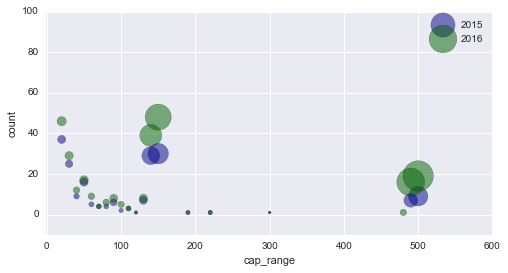

In [404]:
ax=df_gen_cap_pop_aug15fin_all.plot.scatter(x='cap_range',y='count',s=df_gen_cap_pop_aug15fin_all['gen']/10,alpha=.5
                                        ,label='2015',color='DarkBlue',xlim=[-1,600],ylim=[-10,100])
df_gen_cap_pop_aug16fin_all.plot.scatter(x='cap_range',y='count',s=df_gen_cap_pop_aug16fin_all['gen']/10,alpha=.5
                                     ,label='2016',color='DarkGreen',ax=ax,xlim=[-1,600],ylim=[-10,100])

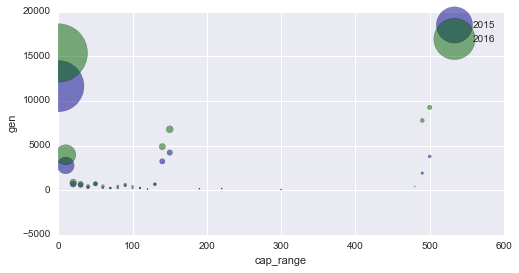

In [393]:
ax=df_gen_cap_pop_aug15fin_all.plot.scatter(x='cap_range',y='gen',s=df_gen_cap_pop_aug15fin_all['count'],alpha=.5
                                        ,label='2015',color='DarkBlue',xlim=[-1,600])
df_gen_cap_pop_aug16fin_all.plot.scatter(x='cap_range',y='gen',s=df_gen_cap_pop_aug16fin_all['count'],alpha=.5
                                     ,label='2016',color='DarkGreen',ax=ax,xlim=[-1,600])

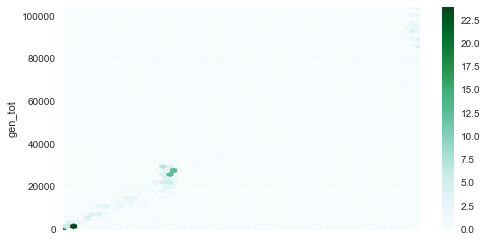

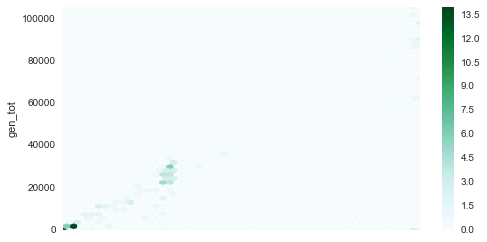

In [334]:
df_gen_cap_pop_aug16.plot.hexbin(x='cap_range', y='gen_tot', gridsize=50)
df_gen_cap_pop_aug15.plot.hexbin(x='cap_range', y='gen_tot', gridsize=50)

In [330]:
df_gen_cap_pop_aug16.head()

,msrmt_year,msrmt_month,gen_tot,capacity,pop,cap_range,count
1,2016,8,22799.440,150.0,4219977357,150.0,1
14,2016,8,687.750,3.8,1985095195,0.0,1
34,2016,8,6533.352,34.2,3475120151,30.0,1
53,2016,8,61.990,7.7,6617583742,0.0,1
66,2016,8,7659.000,50.0,4326447093,50.0,1


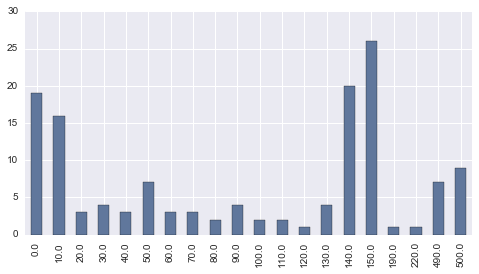

In [230]:
df_gen_cap_pop[(df_gen_cap_pop.msrmt_month==8)&(df_gen_cap_pop.msrmt_year==2015)].cap_range.value_counts().sort_index().plot(kind='bar')
#df_gen_cap_pop[(df_gen_cap_pop.msrmt_month==8)&(df_gen_cap_pop.msrmt_year==2016)].cap_range.value_counts().sort_index().plot(kind='bar')

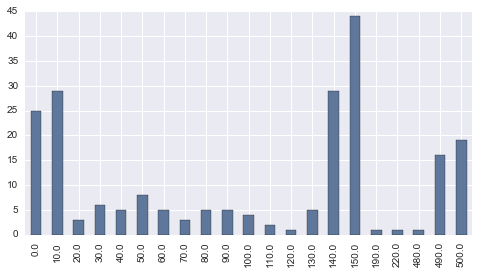

In [231]:
df_gen_cap_pop[(df_gen_cap_pop.msrmt_month==8)&(df_gen_cap_pop.msrmt_year==2016)].cap_range.value_counts().sort_index().plot(kind='bar')

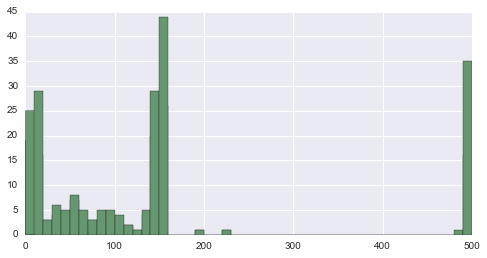

In [229]:
df_gen_cap_pop[(df_gen_cap_pop.msrmt_month==8)&(df_gen_cap_pop.msrmt_year==2015)].cap_range.sort_index().hist(bins=50)
df_gen_cap_pop[(df_gen_cap_pop.msrmt_month==8)&(df_gen_cap_pop.msrmt_year==2016)].cap_range.sort_index().hist(bins=50)

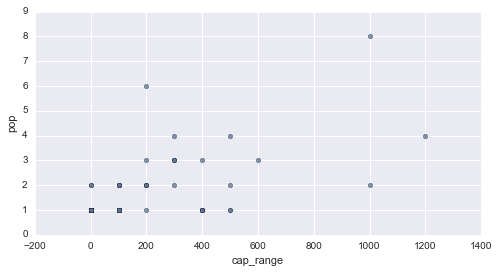

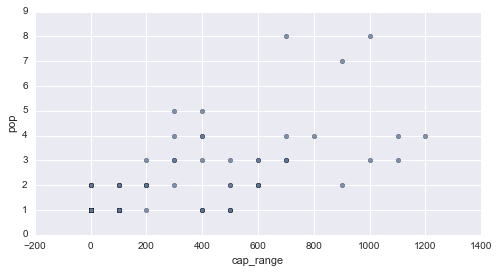

In [196]:
df_gen_cap_pop[(df_gen_cap_pop.msrmt_month==8)&(df_gen_cap_pop.msrmt_year==2015)].plot.scatter(x='cap_range',y='pop',alpha=0.8).grid(True)
df_gen_cap_pop[(df_gen_cap_pop.msrmt_month==8)&(df_gen_cap_pop.msrmt_year==2016)].plot.scatter(x='cap_range',y='pop',alpha=0.8).grid(True)




In [143]:
#df_gen_cap_city[(df_gen_cap_city.msrmt_month==8)&(df_gen_cap_city.msrmt_year==2016)].plot.scatter(x='gen',y='capacity')
#df_gen_cap_city[(df_gen_cap_city.msrmt_month==8)&(df_gen_cap_city.msrmt_year==2015)].plot.scatter(x='gen',y='capacity')
help(df_gen_cap_city.plot.scatter)



Help on method scatter in module pandas.tools.plotting:

scatter(x, y, s=None, c=None, **kwds) method of pandas.tools.plotting.FramePlotMethods instance
    Scatter plot
    
    .. versionadded:: 0.17.0
    
    Parameters
    ----------
    x, y : label or position, optional
        Coordinates for each point.
    s : scalar or array_like, optional
        Size of each point.
    c : label or position, optional
        Color of each point.
    **kwds : optional
        Keyword arguments to pass on to :py:meth:`pandas.DataFrame.plot`.
    
    Returns
    -------
    axes : matplotlib.AxesSubplot or np.array of them



In [162]:
# Read dataset
StandAlone_GEN = pd.read_csv('STANDALONE.csv',sep='|')
#help(pd.read_csv)



In [43]:
StandAlone_GEN.head()

,msrmt_year,msrmt_month,msrmt_dttm,msrmt_val,name,premise_address,premise_city,premise_zip,gen_type,feeder
0,2015,1,2015-01-01 00:00:00.0,0.0,MIDDLEBURY NATURAL FOODS,3830 ETHAN ALLEN HIGHWAY,NEW HAVEN,05472,PV,WY-G80
1,2015,1,2015-01-01 00:00:00.0,0.0,MIDDLEBURY COLLEGE,COLLEGE ST GENERATION,MIDDLEBURY,05753,NaN,M-G24
2,2015,1,2015-01-01 00:00:00.0,0.0,SUDBURY ERVIN GMC SOLAR LLC,2955 VT ROUTE 30,SUDBURY,05733,PV,LJ-G13
3,2015,1,2015-01-01 00:00:00.0,0.0,J A MORRISSEY INC-SOLAR,520 JOHNNIE BROOK RD (SOLAR STAND ALONE),RICHMOND,05477,PV,51G1
4,2015,1,2015-01-01 00:00:00.0,0.0,SOUTH RIDGE SOLAR LLC,MIDDLE RD,MIDDLEBURY,05753,PV,M-G24


In [52]:
StandAlone_GEN.describe()

,msrmt_year,msrmt_month,msrmt_val
count,3.195474e+06,3.195474e+06,3.195474e+06
mean,2.015603e+03,6.415402e+00,2.645009e+01
std,4.891812e-01,3.231446e+00,7.035550e+01
min,2.015000e+03,1.000000e+00,0.000000e+00
25%,2.015000e+03,4.000000e+00,0.000000e+00
50%,2.016000e+03,7.000000e+00,2.880000e-02
75%,2.016000e+03,9.000000e+00,1.272000e+01
max,2.016000e+03,1.200000e+01,8.979360e+02


In [53]:
StandAlone_GEN.msrmt_val.describe()

count    3.195474e+06
mean     2.645009e+01
std      7.035550e+01
min      0.000000e+00
25%      0.000000e+00
50%      2.880000e-02
75%      1.272000e+01
max      8.979360e+02
Name: msrmt_val, dtype: float64

In [54]:
StandAlone_GEN.msrmt_val.std()

70.35549689260172

In [55]:
StandAlone_GEN.msrmt_val.median()

0.0288

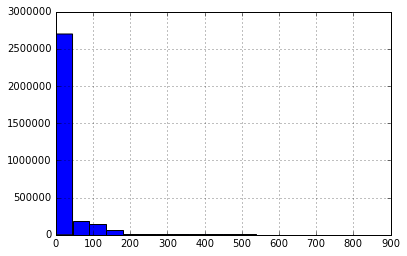

In [56]:
StandAlone_GEN.msrmt_val.hist(bins=20)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x117aff5c0>],
 'caps': [<matplotlib.lines.Line2D at 0x117b06f60>,
 'fliers': [<matplotlib.lines.Line2D at 0x117b12828>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x117b0c8d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x117affef0>,
  <matplotlib.lines.Line2D at 0x117b06748>]}

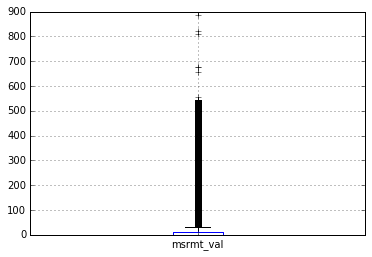

In [57]:
StandAlone_GEN.boxplot(column='msrmt_val')

In [ ]:
#StandAlone_GEN=StandAlone_GEN.set_index('premise_city')
#grouped_gen=pd.DataFrame(columns=('msrmt_year','msrmt_month','premise_city','msmt_val'))
#grouped_gen=
StandAlone_GEN.set_index('msrmt_year','msrmt_month','premise_city')
#StandAlone_GEN.groupby(['msrmt_year','msrmt_month','premise_zip']).msrmt_val.sum()
#help(StandAlone_GEN.groupby)
#plt.scatter()
#grouped_gen
StandAlone_GEN.sum()

In [189]:
    grouped_gen[grouped_gen.msrmt_year==2016]

AttributeError: 'DataFrame' object has no attribute 'msrmt_year'

## help(grouped_gen)

In [101]:
grouped_gen.msrmt_val.mean()

msrmt_year  msrmt_month
2015        1               9.400578
            2              11.233235
            3              21.299585
            4              25.740006
            5              31.987484
            6              28.770758
            7              30.053270
            8              26.468714
            9              24.960875
            10             19.567134
                             ...    
2016        2              17.657781
            3              29.122266
            4              38.146664
            5              36.864452
            6              38.339410
            7              37.248420
            8              34.135821
            9              33.830034
            10             20.326729
            11             20.932523
Name: msrmt_val, dtype: float64

In [129]:
plt.scatter(x=grouped_gen.msrmt_year,y=grouped_gen.msrmt_month)

ValueError: setting an array element with a sequence.

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x11647ee18> (for post_execute):


ValueError: setting an array element with a sequence.

ValueError: setting an array element with a sequence.

In [84]:
grouped_gen.msrmt_val.describe()

msrmt_year  msrmt_month       
2015        1            count    77141.000000
                         mean         9.400578
                         std         34.567937
                         min          0.000000
                         25%          0.000000
                         50%          0.000000
                         75%          1.210000
                         max        507.570000
            2            count    73259.000000
                         mean        11.233235
                                      ...     
2016        10           75%          6.570000
                         max        534.870000
            11           count    65159.000000
                         mean        20.932523
                         std         64.643557
                         min          0.000000
                         25%          0.000000
                         50%          0.000000
                         75%          5.420500
                         max 

In [85]:
StandAlone_GEN.msrmt_year.value_counts()

2016    1928308
2015    1267166
Name: msrmt_year, dtype: int64

In [112]:
grouped_gen.get_group((2015,8)).msrmt_val.mean()
#grouped_gen.get_group((2016,8)).msrmt_val.mean().hist(bins=20)


TypeError: unhashable type: 'list'

//anaconda/lib/python3.5/site-packages/pandas/tools/plotting.py:3082: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  rot=rot, grid=grid, **kwds)


OrderedDict([(2015,
              {'boxes': [<matplotlib.lines.Line2D at 0x1236dca90>],
               'caps': [<matplotlib.lines.Line2D at 0x1236cae80>,
               'fliers': [<matplotlib.lines.Line2D at 0x1236859b0>],
               'means': [],
               'medians': [<matplotlib.lines.Line2D at 0x12368a358>],
               'whiskers': [<matplotlib.lines.Line2D at 0x1236dc7b8>,
                <matplotlib.lines.Line2D at 0x1236d3e10>]}),
             (2016,
              {'boxes': [<matplotlib.lines.Line2D at 0x12367dd68>],
               'caps': [<matplotlib.lines.Line2D at 0x123722898>,
               'fliers': [<matplotlib.lines.Line2D at 0x118512f60>],
               'means': [],
               'medians': [<matplotlib.lines.Line2D at 0x118512208>],
               'whiskers': [<matplotlib.lines.Line2D at 0x12367d278>,
                <matplotlib.lines.Line2D at 0x123718f60>]})])

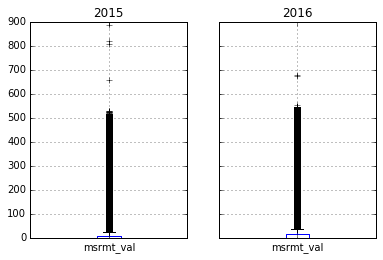

In [67]:
grouped_gen.boxplot(column='msrmt_val')

In [105]:
#seaborn
plt.hist(grouped_gen.get_group(2015).msrmt_val.dropna(),bins=100)
plt.hist(grouped_gen.get_group(2016).msrmt_val.dropna(),bins=100)

ValueError: must supply a tuple to get_group with multiple grouping keys